github有一个Apple股价预测项目，https://github.com/Twabeeric/AAPLTextMining 

探索分析师关于apple的分析报告，其报告所含情感信息与apple股价是否有关系

项目数据包括：
- Apple 2017-2018股价数据
- ThomsonOne网站Sherri Scribner（德意志银行分析师）对Apple公司周度研究报告（2017-2018），有65个docx文件


### 导入数据
我们需要按照日期，将报告与股价数据按照日期合并到一起，
我们先导入分析师报告，一共有65个docx文件

In [27]:
from io import StringIO
import pandas as pd  
import datetime
import re
import docx
import os 


def read_from_docx(file_path):
    """
    读取docx文件，并返回其中的文本内容
    :param file_path: docx文件路径
    :return: docx中的文本内容
    """
    texts = ''
    doc = docx.Document(file_path)
    for para in doc.paragraphs:
        texts += para.text    
    return texts


Date = []
Descriptions = []


flist = [f for f in os.listdir('data/reports') if 'docx' in f]
Descriptions = [read_from_docx('data/reports/'+f) for f in flist]
Dates = [f[:8] for f in flist]

data1 = pd.DataFrame({'Date': Dates,
                   'Descriptions': Descriptions})

data1.head()

,Date,Descriptions
0,20180304,A weekly take on Apple newsFor the week ending...
1,20170804,A weekly take on Apple newsFor the week ending...
2,20171203,A weekly take on Apple newsFor the week ending...
3,20180129,iPhone X demand not living up to high expectat...
4,20180715,A weekly take on Apple newsFor the week ending...


将日期Date整理为datetime类型

In [28]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1.sort_values('Date', inplace=True)
data1.head()

,Date,Descriptions
63,2017-02-01,Apple Inc.Notes to Condensed Consolidated Fina...
20,2017-06-03,Apple Inc.Notes to Condensed Consolidated Fina...
38,2017-08-01,F3Q-17 results: standing tall before the main ...
18,2017-08-02,Apple Inc.Notes to Condensed Consolidated Fina...
1,2017-08-04,A weekly take on Apple newsFor the week ending...


导入Apple公司股价数据

In [29]:
data2= pd.read_csv('data/AAPL.csv')
data2['Date'] = pd.to_datetime(data2['Date'])
data2.head()

,Date,Adj Close,Volume
0,2017-06-01,149.145844,16404100
1,2017-06-02,151.356079,27770700
2,2017-06-05,149.876099,25331700
3,2017-06-06,150.382416,26624900
4,2017-06-07,151.278198,21069600


将股价和分析师报告按照Date合并

In [30]:
df = pd.merge(data1, data2)
df.head()

,Date,Descriptions,Adj Close,Volume
0,2017-08-01,F3Q-17 results: standing tall before the main ...,146.098297,35368600
1,2017-08-02,Apple Inc.Notes to Condensed Consolidated Fina...,153.001572,69936800
2,2017-08-04,A weekly take on Apple newsFor the week ending...,152.271317,20559900
3,2017-08-11,A weekly take on Apple newsFor the week ending...,153.934753,26257100
4,2017-08-18,A weekly take on Apple newsFor the week ending...,153.954300,27428100


### 文本情感计算
pysentiment库对金融文本数据进行情感计算。查了下该库的官方文档，发现该库提供了两大情感分析
- Harvard IV-4 英文通用情感分析，喜怒哀乐，主要是形容词情感词典
- Loughran&MCdonald 英文金融情感分析，金融领域特有的情感词典

该库的教程可见于  http://bit.ly/2LECfw5  

使用pandas的apply批处理方法，可以批量对对某一列施行某种算法（计算函数）

In [31]:
from pysentiment import lm,hiv4

lm = lm.LM()
hiv4 = hiv4.HIV4()

def hiv4_positive(text):
    words = hiv4.tokenize(text)
    score = hiv4.get_score(words)
    return score['Positive']

def hiv4_negative(text):
    words = hiv4.tokenize(text)
    score = hiv4.get_score(words)
    return score['Negative']

def hiv4_polarity(text):
    words = hiv4.tokenize(text)
    score = hiv4.get_score(words)
    return score['Polarity']

def hiv4_subjectivity(text):
    words = hiv4.tokenize(text)
    score = hiv4.get_score(words)
    return score['Subjectivity']

def lm_positive(text):
    words = lm.tokenize(text)
    score = lm.get_score(words)
    return score['Positive']

def lm_negative(text):
    words = lm.tokenize(text)
    score = lm.get_score(words)
    return score['Negative']

def lm_polarity(text):
    words = lm.tokenize(text)
    score = lm.get_score(words)
    return score['Polarity']

def lm_subjectivity(text):
    words = lm.tokenize(text)
    score = lm.get_score(words)
    return score['Subjectivity']


df['hiv4_pos'] = df['Descriptions'].apply(hiv4_positive)
df['hiv4_neg'] = df['Descriptions'].apply(hiv4_negative)
df['hiv4_polarity'] = df['Descriptions'].apply(hiv4_polarity)
df['hiv4_subjectivity'] = df['Descriptions'].apply(hiv4_subjectivity)

df['lm_pos'] = df['Descriptions'].apply(lm_positive)
df['lm_neg'] = df['Descriptions'].apply(lm_negative)
df['lm_polarity'] = df['Descriptions'].apply(lm_polarity)
df['lm_subjectivity'] = df['Descriptions'].apply(lm_subjectivity)

df.head()

,Date,Descriptions,Adj Close,Volume,hiv4_pos,hiv4_neg,hiv4_polarity,hiv4_subjectivity,lm_pos,lm_neg,lm_polarity,lm_subjectivity
0,2017-08-01,F3Q-17 results: standing tall before the main ...,146.098297,35368600,41,20,0.344262,0.167582,12,14,-0.076923,0.071429
1,2017-08-02,Apple Inc.Notes to Condensed Consolidated Fina...,153.001572,69936800,2836,979,0.486763,0.358452,241,581,-0.413625,0.077234
2,2017-08-04,A weekly take on Apple newsFor the week ending...,152.271317,20559900,65,30,0.368421,0.166375,12,20,-0.250000,0.056042
3,2017-08-11,A weekly take on Apple newsFor the week ending...,153.934753,26257100,69,26,0.452632,0.162116,11,35,-0.521739,0.078498
4,2017-08-18,A weekly take on Apple newsFor the week ending...,153.954300,27428100,92,31,0.495935,0.206376,11,26,-0.405405,0.062081


### 可视化
查看股价与报告的情感得分走势关系

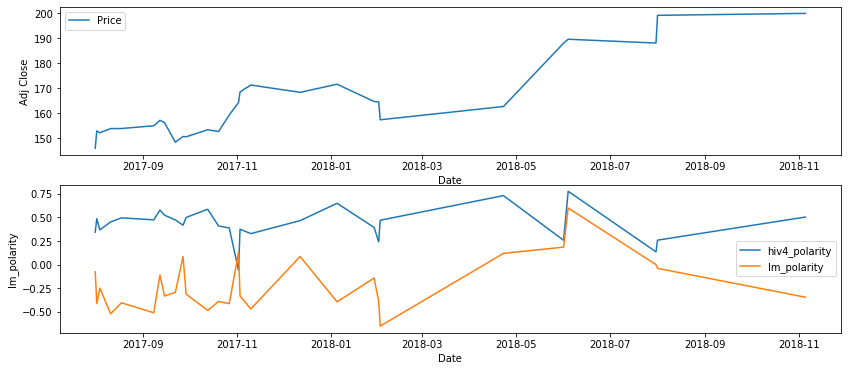

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))
axes[0].set_title('Stock Price、HIV4_polarity & LM_polarity')
sns.lineplot(x="Date", y="Adj Close", data = df, label='Price', ax=axes[0]);
sns.lineplot(x="Date", y="hiv4_polarity", data = df, label='hiv4_polarity', ax=axes[1]);
sns.lineplot(x="Date", y="lm_polarity", data = df, label='lm_polarity', ax=axes[1]);

本文只是找了很少的数据，从图中走势看，LM金融情感极性得分（lm_polarity）与股价price走势更相似。说明对于苹果公司而言，通过对股评师有关苹果公司的报告进行文本情感计算，能够一定程度上预测股价走势。